# Tensorflow Project 
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [1]:
import pandas as pd

In [2]:
bank_notes = pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [3]:
bank_notes.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

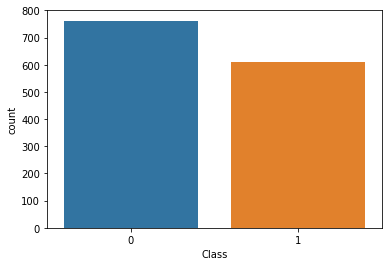

In [5]:
sns.countplot(data=bank_notes, x = 'Class')

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

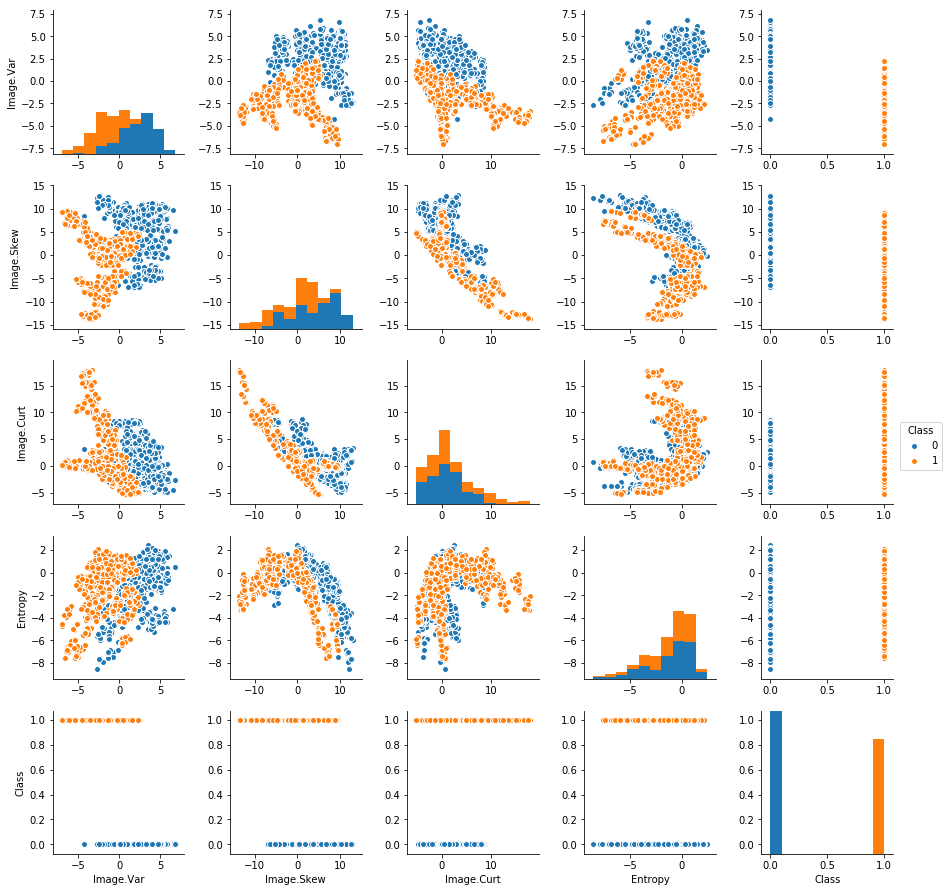

In [119]:
sns.pairplot(bank_notes, hue='Class');

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling

** Import StandardScaler() from SciKit Learn**

In [8]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [9]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [11]:
scaler.fit(bank_notes.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [12]:
scaled_features = scaler.transform(bank_notes.drop('Class',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [17]:
scaled_features = pd.DataFrame(scaled_features, columns=bank_notes.drop('Class',axis=1).columns)
scaled_features.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

** Use the .as_matrix() method on X and Y and reset them equal to this result. We need to do this in order for TensorFlow to accept the data in Numpy array form instead of a pandas series. **

In [21]:
X = scaled_features.as_matrix()

In [20]:
y = bank_notes['Class'].as_matrix()

** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [22]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Contrib.learn

** Import tensorflow.contrib.learn.python.learn as learn**

In [93]:
import tensorflow as tf

In [94]:
tf.logging.set_verbosity(tf.logging.ERROR)

** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [95]:
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)

In [96]:
classifier = tf.contrib.learn.SKCompat(tf.contrib.learn.DNNClassifier(hidden_units=[10, 20, 10],
                                                                      n_classes=2, feature_columns=feature_columns))

** Now fit classifier to the training data. Use steps=200 with a batch_size of 20. You can play around with these values if you want!**

In [108]:
classifier.fit(X_train, y_train, steps=2000, batch_size=20)

SKCompat()

## Model Evaluation

** Use the predict method from the classifier model to create predictions from X_test **

In [109]:
predicted_y_dnn = classifier.predict(X_test)['classes']

** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [110]:
from sklearn.metrics import confusion_matrix, classification_report

In [111]:
print (confusion_matrix(predicted_y_dnn, y_test))

[[220   0]
 [  0 192]]


In [112]:
print (classification_report(y_test, predicted_y_dnn))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       220
          1       1.00      1.00      1.00       192

avg / total       1.00      1.00      1.00       412



## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rand_forest = RandomForestClassifier()

In [115]:
rand_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [116]:
predicted_y_rf = rand_forest.predict(X_test)

In [117]:
print (classification_report(predicted_y_rf, y_test))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00       222
          1       0.99      1.00      0.99       190

avg / total       1.00      1.00      1.00       412



In [118]:
print(confusion_matrix(predicted_y_rf, y_test))

[[220   2]
 [  0 190]]


** It should have also done very well, but not quite as good as the DNN model. Hopefully you have seen the power of DNN! **